In [53]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from acoustics import Signal
from acoustics.standards.iso_tr_25417_2007 import peak_sound_pressure_level

In [106]:
def plot_impluse(time_s, singal, x_max=0.01):
    Peak_SPL = peak_sound_pressure_level(singal.values)
    fig, ax = plt.subplots(1, figsize=(6.5,5))
    ax.plot(time_s, singal.values)
    ax.set_xlim(0, x_max)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Pressure (Pa)")
    y_lim = ax.get_ylim()
    ax.text(x=x_max/5, y=y_lim[1]*2/3, s=f"Peak SPL = {round(Peak_SPL,2)} dB")
    plt.title("Example of Impulse")
    plt.show()

## Task 1

impulses with peak SPL of 145 dB at 1 Hz pulse repetition rate (total duration: 11 min 40 s);

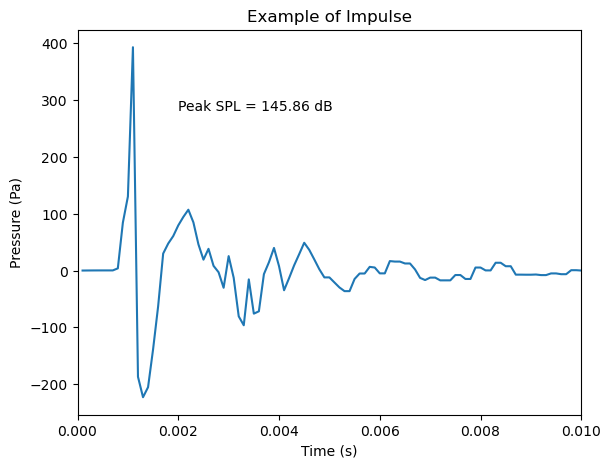

In [87]:
df = pd.read_excel("WaveinPaper.xlsx")
time_s_segment_1 = df.iloc[:,0].dropna().values / 1000
pressure_pa_segment_1 = df.iloc[:,1].dropna().values * 1000
fs_segment_1 = int(1 / np.mean(np.diff(time_s_segment_1)))
s_segment_1 = Signal(pressure_pa_segment_1, fs=fs_segment_1)

plot_impluse(time_s_segment_1, s_segment_1)

进行拼接，共700段

In [80]:
time_s_1 = np.array([])
pressure_pa_1 = np.array([])
for i in tqdm(range(700)):
    time_s_1 = np.hstack((time_s_1, time_s_segment_1 + i))
    pressure_pa_1 = np.hstack((pressure_pa_1, pressure_pa_segment_1))

100%|██████████| 700/700 [00:11<00:00, 61.01it/s] 


检查数值

In [83]:
n = 77
print(pressure_pa_1[n], pressure_pa_1[10000+n], pressure_pa_1[40000+n], pressure_pa_1[80000+n])

-14.833755665766 -14.833755665766 -14.833755665766 -14.833755665766


计算Leq，LAeq等值

In [82]:
fs_1 = int(1 / np.mean(np.diff(time_s_1)))
s_1 = Signal(pressure_pa_1, fs=fs_1)
Leq = s_1.leq()
LAeq = s_1.weigh("A").leq()
LCeq = s_1.weigh("C").leq()
Peak_SPL = peak_sound_pressure_level(s_1.values)
print(f"""
      Leq = {Leq}
      LAeq = {LAeq}
      LCeq = {LCeq}
      Peak SPL = {Peak_SPL}""")


      Leq = 110.19964820789198
      LAeq = 109.80005478072849
      LCeq = 109.63040746533378
      Peak SPL = 145.86355512632161


# Task 2

2.	impulses with peak SPL of 137 dB at 1 Hz pulse repetition rate (total duration: 8 min 20 s);

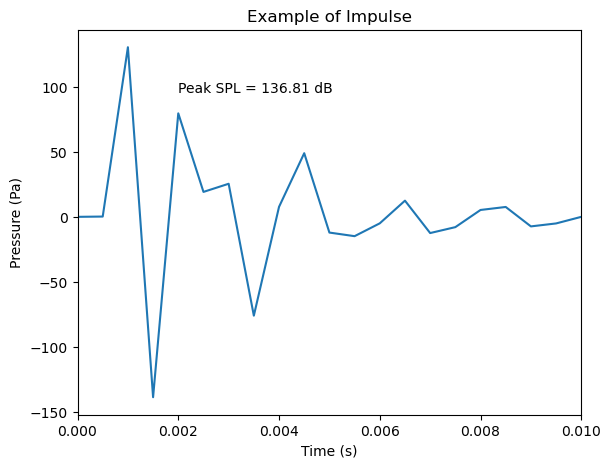

In [88]:
time_s_segment_2 = df.iloc[:,3].dropna().values / 1000
pressure_pa_segment_2 = df.iloc[:,4].dropna().values * 1000
fs_segment_2 = int(1 / np.mean(np.diff(time_s_segment_2)))
s_segment_2 = Signal(pressure_pa_segment_2, fs=fs_segment_2)

plot_impluse(time_s_segment_2, s_segment_2)

进行拼接，共500段

In [90]:
time_s_2 = np.array([])
pressure_pa_2 = np.array([])
for i in tqdm(range(500)):
    time_s_2 = np.hstack((time_s_2, time_s_segment_2 + i))
    pressure_pa_2 = np.hstack((pressure_pa_2, pressure_pa_segment_2))

100%|██████████| 500/500 [00:01<00:00, 445.54it/s] 


检查数值

In [104]:
n = 3
print(pressure_pa_2[n], pressure_pa_2[2001+n], pressure_pa_2[4002+n], pressure_pa_2[8004+n])

-138.451716814867 -138.451716814867 -138.451716814867 -138.451716814867


计算

In [105]:
fs_2 = int(1 / np.mean(np.diff(time_s_2)))
s_2 = Signal(pressure_pa_2, fs=fs_2)
Leq = s_2.leq()
LAeq = s_2.weigh("A").leq()
LCeq = s_2.weigh("C").leq()
Peak_SPL = peak_sound_pressure_level(s_2.values)
print(f"""
      Leq = {Leq}
      LAeq = {LAeq}
      LCeq = {LCeq}
      Peak SPL = {Peak_SPL}""")


      Leq = 108.17408263039223
      LAeq = 107.64983932506186
      LCeq = 107.31812568854676
      Peak SPL = 136.8053669949034


# Task 3

impulses with peak SPL of 163 dB and the pulse width is 0.25 s. The interval between two pulses is 6.5s, total 15 times.

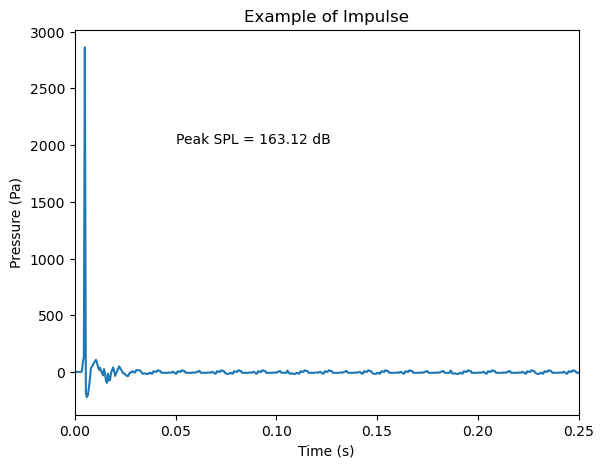

In [114]:
df = pd.read_excel("WaveinPaper.xlsx")
time_s_segment_3 = df.iloc[:,6].dropna().values / 1000
pressure_pa_segment_3 = df.iloc[:,7].dropna().values * 1000
fs_segment_3 = int(1 / np.mean(np.diff(time_s_segment_3)))
s_segment_3 = Signal(pressure_pa_segment_3, fs=fs_segment_3)

plot_impluse(time_s_segment_3, s_segment_3, x_max=0.25)

拼接，共15段

In [115]:
time_s_3 = np.array([])
pressure_pa_3 = np.array([])
for i in tqdm(range(15)):
    time_s_3 = np.hstack((time_s_3, time_s_segment_3 + i))
    pressure_pa_3 = np.hstack((pressure_pa_3, pressure_pa_segment_3))

100%|██████████| 15/15 [00:00<00:00, 1651.86it/s]


计算

In [116]:
fs_3 = int(1 / np.mean(np.diff(time_s_3)))
s_3 = Signal(pressure_pa_3, fs=fs_3)
Leq = s_3.leq()
LAeq = s_3.weigh("A").leq()
LCeq = s_3.weigh("C").leq()
Peak_SPL = peak_sound_pressure_level(s_3.values)
print(f"""
      Leq = {Leq}
      LAeq = {LAeq}
      LCeq = {LCeq}
      Peak SPL = {Peak_SPL}""")


      Leq = 121.9653892227761
      LAeq = 121.34252916816223
      LCeq = 120.56192270094203
      Peak SPL = 163.11531979992822


# 倍频程计算尝试

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functional import seq
from scipy.stats import kurtosis
from acoustics import Signal
from acoustics.standards.iso_tr_25417_2007 import sound_pressure_level, peak_sound_pressure_level

from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

config = {
            "font.family": "serif",
            "font.size": 12,
            "mathtext.fontset": "stix",# matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ["STZhongsong"],# 华文中宋
            "axes.unicode_minus": False # 处理负号，即-号
         }
rcParams.update(config)


In [3]:
s = Signal.from_wav("./example_files/Gaussian.wav")

In [38]:
center_freq, octaves = s.third_octaves()
freq_kurtosises = []
freq_SPLs = []
for freq_index in np.arange(8, 35, 3):
    s_octave = octaves[freq_index]
    freq_kurtosis = kurtosis(s_octave.values, fisher=False)
    freq_SPL = sound_pressure_level(s_octave.values)
    freq_kurtosises.append(round(freq_kurtosis, 2))
    freq_SPLs.append(freq_SPL)

In [39]:
pd.DataFrame(dict(zip([63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000], freq_SPLs)))

,63,125,250,500,1000,2000,4000,8000,16000
0,-175.765558,-151.787055,-127.829883,-103.915091,-80.084126,-56.417543,-33.067762,-10.307445,11.433308
1,-177.259635,-153.340851,-129.521030,-105.956661,-83.175751,-63.876659,-39.292831,0.413242,31.933513
2,-147.010912,-123.028788,-99.062999,-75.125623,-51.229842,-27.373233,-3.591851,18.480028,38.684865
3,-132.260726,-108.290650,-84.352474,-60.484375,-36.782899,-13.535425,8.108744,16.975327,39.191146
4,-122.959314,-99.001298,-75.091468,-51.297120,-27.812967,-5.304591,13.052417,30.423652,54.329084
...,...,...,...,...,...,...,...,...,...
499995,-22.176491,-33.830941,-31.827261,-9.229766,-20.219131,-1.713609,4.396247,55.348785,67.480012
499996,-22.158245,-32.951907,-34.827673,-8.592559,-18.085139,-3.020546,1.947701,50.917987,68.877247
499997,-22.140716,-32.160511,-39.457396,-8.040140,-16.474199,-5.517391,-9.166733,58.858899,38.076146
499998,-22.123899,-31.441535,-50.018293,-7.564472,-15.308236,-9.633088,-12.512789,39.641871,64.533184


In [37]:
int(f[8].center[0])

63